In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [3]:
DIRECTORY = r"C:\Users\HP\Face-Mask-Detection\dataset"  # Update this to your dataset directory
CATEGORIES = ["with_mask", "without_mask"]

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = image / 255.0
        data.append(image)
        labels.append(category)

# Convert data and labels to numpy arrays
data = np.array(data, dtype="float32").reshape(-1, 224, 224, 3)
labels = np.array(labels)

# One-hot encode the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)


C:\Users\HP\anaconda3\anacondanavigator\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
# Define the CNN model
from tensorflow.keras import Input
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224 , 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

C:\Users\HP\anaconda3\anacondanavigator\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),  # This replaces Flatten
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [5]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
 history = model.fit(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY),epochs=10,verbose=1)


Epoch 1/10


C:\Users\HP\anaconda3\anacondanavigator\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6422 - loss: 0.6089 - val_accuracy: 0.7705 - val_loss: 0.4785
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7926 - loss: 0.4601 - val_accuracy: 0.8018 - val_loss: 0.4564
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.7948 - loss: 0.4661 - val_accuracy: 0.7640 - val_loss: 0.4889
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8037 - loss: 0.4370 - val_accuracy: 0.7927 - val_loss: 0.4605
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.8300 - loss: 0.4131 - val_accuracy: 0.7640 - val_loss: 0.4962
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8151 - loss: 0.4283 - val_accuracy: 0.8005 - val_loss: 0.4554
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.7949 - loss: 0.4628 - val_accuracy: 0.7327 - val_loss: 0.5796
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7888 - loss: 0.4608 - val_accuracy: 0.7953 - val_loss: 0.

In [7]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step
              precision    recall  f1-score   support

   with_mask       0.80      0.84      0.82       383
without_mask       0.83      0.79      0.81       384

    accuracy                           0.82       767
   macro avg       0.82      0.82      0.82       767
weighted avg       0.82      0.82      0.82       767



In [11]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.export('mask_detector_model')
#model.save("mask_detector.model.h5")

[INFO] saving mask detector model...


ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.

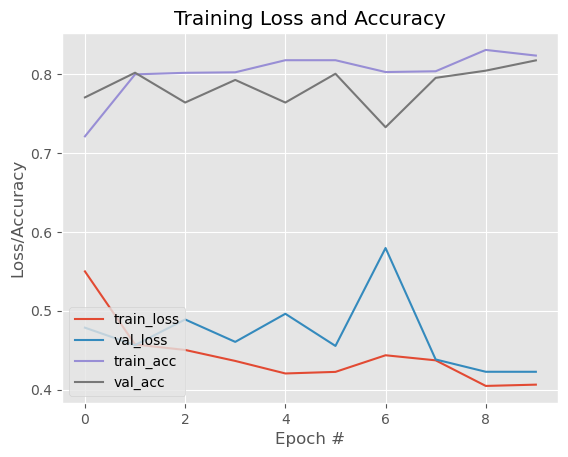

In [10]:
# plot the training loss and accuracy
"""N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")"""
# as above code was not working, the below added 
N = len(history.history["loss"])  # Dynamically set N to the number of recorded epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")